In [1]:
from eli5.sklearn import PermutationImportance
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('kubra.csv')

X = df.iloc[:, 0:881]
y = df.iloc[:, -1].values  


In [3]:
clf = RandomForestRegressor()


In [4]:
sel = SelectFromModel(clf,threshold=0.005).fit(X, y)
feature_idx = sel.get_support()
feature_name = X.columns[feature_idx]


In [5]:
len(feature_name)

49

In [6]:
feature_name

Index(['PubchemFP2', 'PubchemFP12', 'PubchemFP17', 'PubchemFP19',
       'PubchemFP23', 'PubchemFP24', 'PubchemFP25', 'PubchemFP144',
       'PubchemFP152', 'PubchemFP187', 'PubchemFP188', 'PubchemFP287',
       'PubchemFP333', 'PubchemFP335', 'PubchemFP349', 'PubchemFP359',
       'PubchemFP364', 'PubchemFP368', 'PubchemFP374', 'PubchemFP375',
       'PubchemFP391', 'PubchemFP438', 'PubchemFP450', 'PubchemFP485',
       'PubchemFP494', 'PubchemFP519', 'PubchemFP528', 'PubchemFP533',
       'PubchemFP539', 'PubchemFP560', 'PubchemFP581', 'PubchemFP593',
       'PubchemFP596', 'PubchemFP601', 'PubchemFP620', 'PubchemFP621',
       'PubchemFP636', 'PubchemFP638', 'PubchemFP642', 'PubchemFP643',
       'PubchemFP669', 'PubchemFP672', 'PubchemFP674', 'PubchemFP684',
       'PubchemFP708', 'PubchemFP716', 'PubchemFP758', 'PubchemFP801',
       'PubchemFP821'],
      dtype='object')

In [5]:
X_columns = df[feature_name] 
X_new = df[feature_name].values

<AxesSubplot:xlabel='Importance', ylabel='Features'>

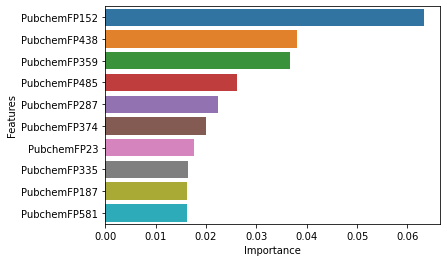

In [29]:
df_selected = pd.DataFrame({'Features': df.columns[:-1],  'Importance': sel.estimator_.feature_importances_})
df_selected_sort = df_selected.sort_values('Importance', ascending=False).head(10)
sns.barplot(data=df_selected_sort, x='Importance', y='Features')

In [6]:
import matplotlib.pyplot as plt

In [7]:
def scoreResults(model, x_train, x_test, y_train, y_test):

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)

    return [r2_train, r2_test, mse_train, mse_test]

In [8]:
model_rf = RandomForestRegressor()

In [9]:
scores = []

k = 10
iter = 1
cv = KFold(n_splits=k)
for train_index, test_index in cv.split(X_new):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    x_train, x_test, y_train, y_test = X_new[train_index], X_new[test_index], y[train_index], y[test_index]
    model_rf.fit(x_train, y_train)
    
    if iter == 6:
        x_train_sel = x_train
        x_test_sel = x_test
        y_train_sel = y_train
        y_test_sel = y_test
        
    result = scoreResults(model = model_rf
                          ,x_train = x_train
                          ,x_test = x_test
                          ,y_train = y_train
                          ,y_test = y_test)

    print(f"{iter}. veri kesiti")
    print(f"Train R2 Score: {result[0]:.4f} MSE: {result[2]:.4f}")
    print(f"Test R2 Score: {result[1]:9.4f} MSE: {result[3]:.4f}\n")
    iter += 1
    scores.append(model_rf.score(x_test, y_test))

1. veri kesiti
Train R2 Score: 0.7701 MSE: 0.2009
Test R2 Score:   -0.4014 MSE: 1.1294

2. veri kesiti
Train R2 Score: 0.7412 MSE: 0.2288
Test R2 Score:   -0.0166 MSE: 0.7697

3. veri kesiti
Train R2 Score: 0.7185 MSE: 0.2508
Test R2 Score:    0.1801 MSE: 0.5490

4. veri kesiti
Train R2 Score: 0.7438 MSE: 0.2443
Test R2 Score:   -0.8252 MSE: 0.6050

5. veri kesiti
Train R2 Score: 0.7132 MSE: 0.2679
Test R2 Score:   -0.2136 MSE: 0.3893

6. veri kesiti
Train R2 Score: 0.7042 MSE: 0.2525
Test R2 Score:    0.5670 MSE: 0.5285

7. veri kesiti
Train R2 Score: 0.7006 MSE: 0.2475
Test R2 Score:    0.1805 MSE: 0.7760

8. veri kesiti
Train R2 Score: 0.7331 MSE: 0.2245
Test R2 Score:   -0.1328 MSE: 0.8543

9. veri kesiti
Train R2 Score: 0.7424 MSE: 0.2371
Test R2 Score:   -0.4329 MSE: 0.8350

10. veri kesiti
Train R2 Score: 0.7199 MSE: 0.2571
Test R2 Score:   -0.3029 MSE: 0.6161



In [10]:
model = RandomForestRegressor()

model.fit(x_train_sel, y_train_sel)


print(r2_score(y_train_sel, model.predict(x_train_sel)))
print(r2_score(y_test_sel, model.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model.predict(x_test_sel)))


0.7054435334110456
0.5363341640151096
0.3751473168935825
0.5467759024571421
0.2514031799166011
0.5659977506896481


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

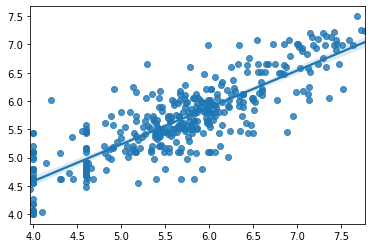

In [11]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns

rf_predict = model.predict(x_train_sel)

sns.regplot(y_train_sel, rf_predict)



In [12]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_xgb.predict(x_train_sel)))
print(r2_score(y_test_sel, model_xgb.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_xgb.predict(x_train_sel)))
print(mean_squared_error(y_train_sel, model_xgb.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_xgb.predict(x_test_sel)))
print(mean_squared_error(y_test_sel, model_xgb.predict(x_test_sel)))



0.7472464020092907
0.4686791386295308
0.2980230725632285
0.2157245400383594
0.5811227325912369
0.6485843663495013


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

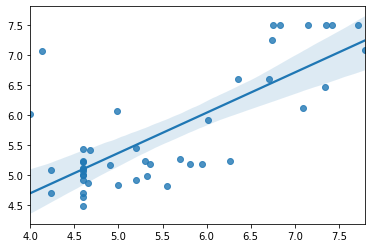

In [13]:
rf_predict = model.predict(x_test_sel)

sns.regplot(y_test_sel, rf_predict)

In [14]:
from sklearn.tree import DecisionTreeRegressor

model_dcs = DecisionTreeRegressor()

model_dcs.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_dcs.predict(x_train_sel)))
print(r2_score(y_test_sel, model_dcs.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_dcs.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_dcs.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_dcs.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_dcs.predict(x_test_sel)))


0.7498136021957316
0.41757456565131656
0.2816076323782956
0.5580600126475571
0.21353344134062008
0.7109678138903005


In [15]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor()

model_mlp.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_mlp.predict(x_train_sel)))
print(r2_score(y_test_sel, model_mlp.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_mlp.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_mlp.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_mlp.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_mlp.predict(x_test_sel)))

0.3169368392124845
0.5440892903787722
0.6343571561545729
0.547982942559145
0.5829926353153283
0.5565310534747814


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor()

model_bag.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_bag.predict(x_train_sel)))
print(r2_score(y_test_sel, model_bag.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_bag.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_bag.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_bag.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_bag.predict(x_test_sel)))

0.6919089239453902
0.5286183056466038
0.3759878343795576
0.5124666150235956
0.26295493397584363
0.575416513389595


In [17]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()

model_lin.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_lin.predict(x_train_sel)))
print(r2_score(y_test_sel, model_lin.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_lin.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_lin.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_lin.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_lin.predict(x_test_sel)))


0.42082568565236866
-2.5987050723667506e+20
0.5818101094013292
2685078350.601082
0.4943237744503544
3.1722441282331e+20


In [18]:
from sklearn.svm import SVR

model_svm = SVR()

model_svm.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_svm.predict(x_train_sel)))
print(r2_score(y_test_sel, model_svm.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_svm.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_svm.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_svm.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_svm.predict(x_test_sel)))

0.5096048288149065
0.5465664175018452
0.4958052269715478
0.5613641669759626
0.4185510061258373
0.5535072197759852


In [19]:
from sklearn.linear_model import Ridge
model_rid = Ridge()

model_rid.fit(x_train_sel, y_train_sel)
print(r2_score(y_train_sel, model_rid.predict(x_train_sel)))
print(r2_score(y_test_sel, model_rid.predict(x_test_sel)))
print(mean_absolute_error(y_train_sel, model_rid.predict(x_train_sel)))
print(mean_absolute_error(y_test_sel, model_rid.predict(x_test_sel)))
print(mean_squared_error(y_train_sel, model_rid.predict(x_train_sel)))
print(mean_squared_error(y_test_sel, model_rid.predict(x_test_sel)))


0.4192306456000686
0.5867027448141551
0.5834936490703104
0.533687998431205
0.495685136996172
0.5045127301745318


In [20]:
import random
random.seed(0)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

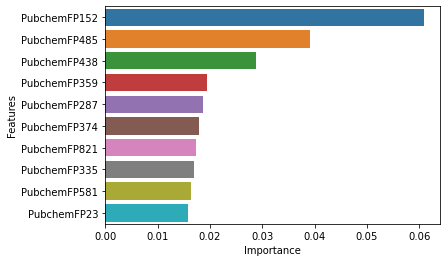

In [21]:
df_selected = pd.DataFrame({'Features': df.columns[:-1],  'Importance': sel.estimator_.feature_importances_})
df_selected_sort = df_selected.sort_values('Importance', ascending=False).head(10)
sns.barplot(data=df_selected_sort, x='Importance', y='Features')

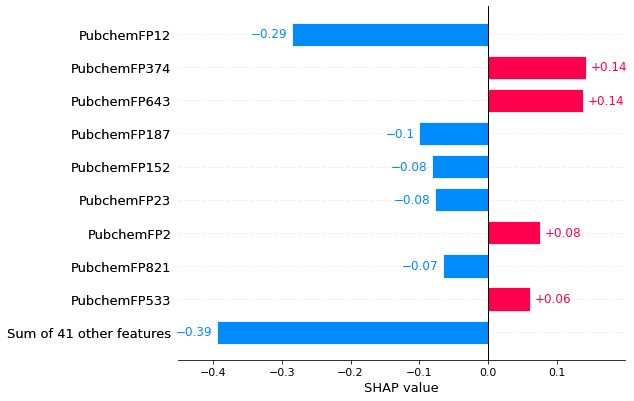

In [23]:
import shap
explainer = shap.TreeExplainer(model, x_train_sel,feature_names=list(feature_name))
shap_values = explainer(x_train_sel)

shap.plots.bar(shap_values[0])

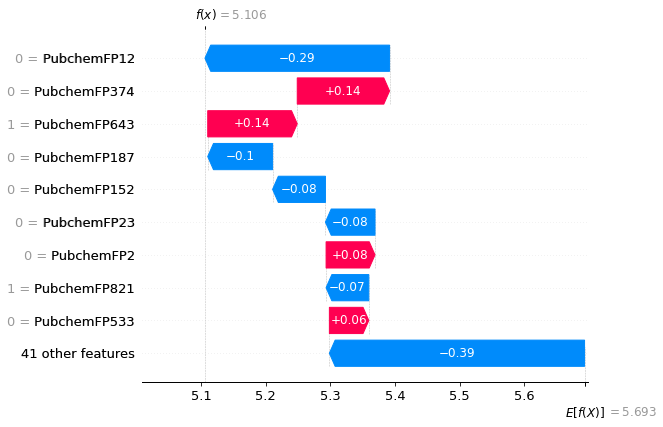

In [24]:

shap.plots.waterfall(shap_values[0])
max_display=31

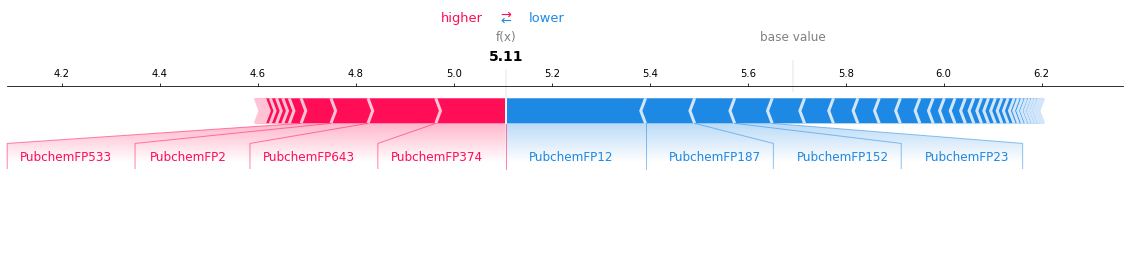

In [25]:
random.seed(0)
shap.plots.force(explainer.expected_value, shap_values[0].values, feature_names=list(feature_name), matplotlib=True)

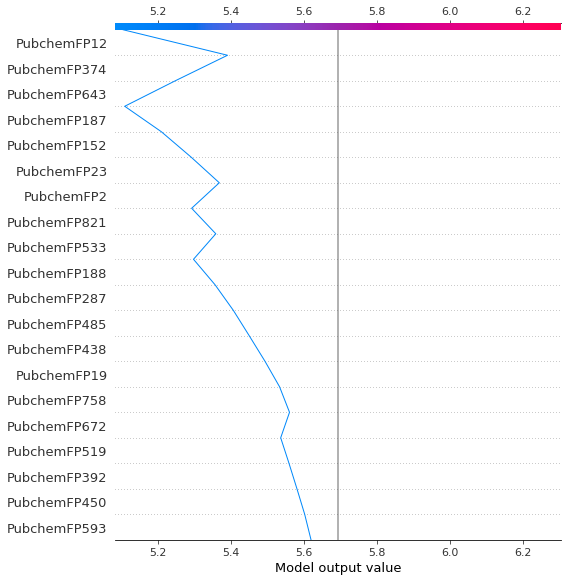

In [26]:
shap.decision_plot(explainer.expected_value, shap_values[0].values, feature_names=list(feature_name))

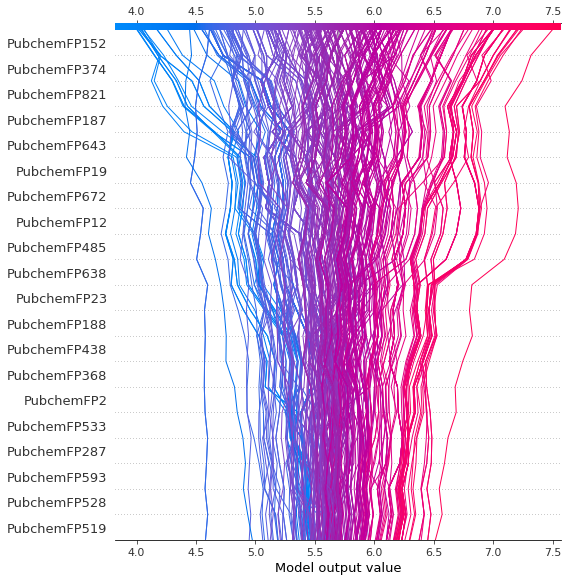

In [27]:
shap.decision_plot(explainer.expected_value, shap_values.values, feature_names=list(feature_name))

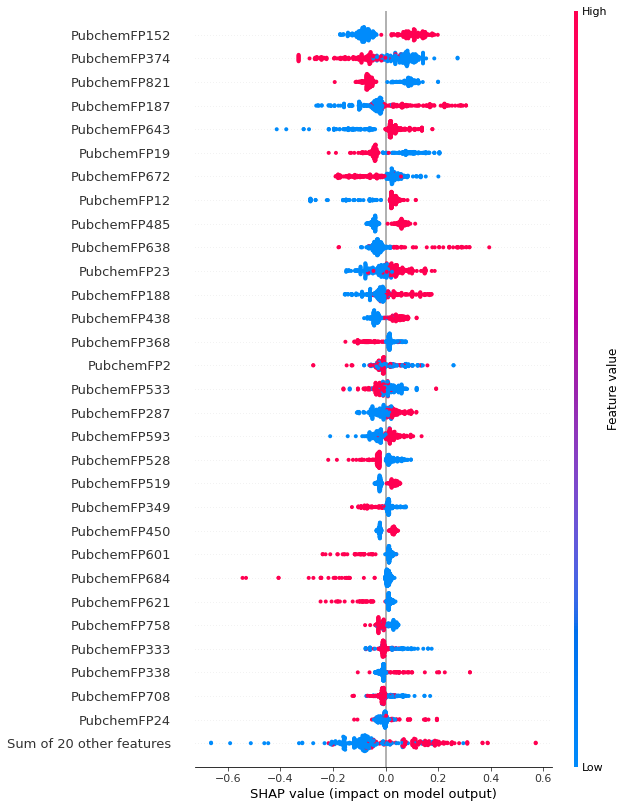

In [28]:
shap.plots.beeswarm(shap_values, max_display=31)

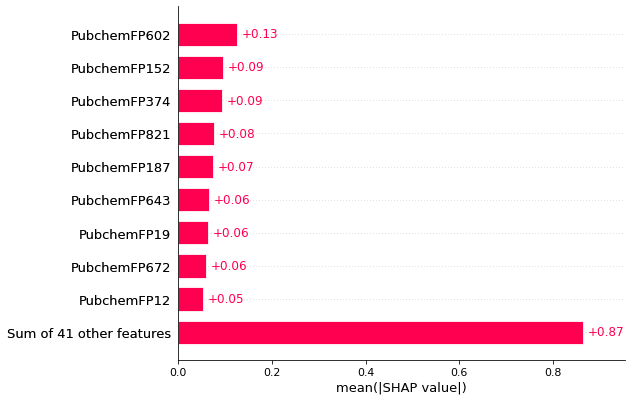

In [29]:
shap.plots.bar(shap_values)
max_display=31

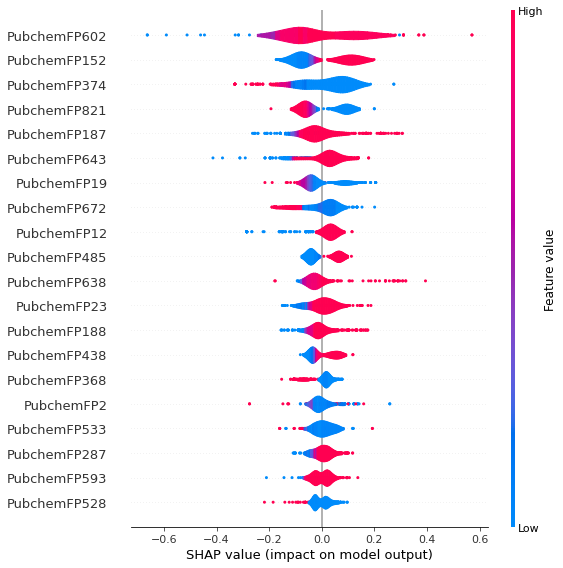

In [30]:
shap.summary_plot(shap_values, feature_names=list(feature_name), plot_type='violin')

In [31]:
shap.initjs()

In [32]:
shap.force_plot(explainer.expected_value, shap_values.values)

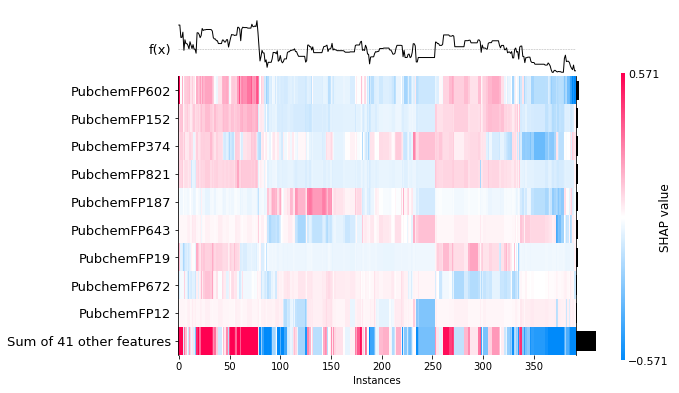

In [33]:
shap.plots.heatmap(shap_values)

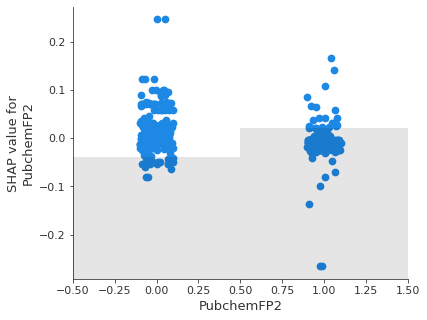

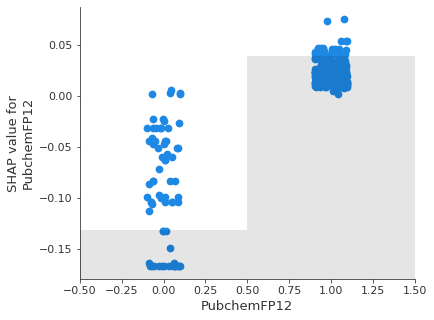

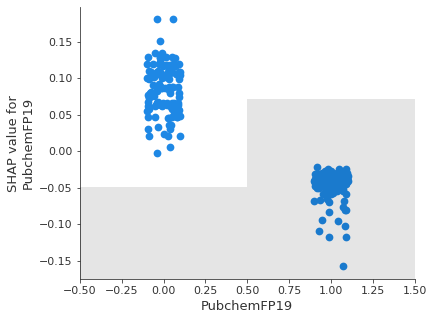

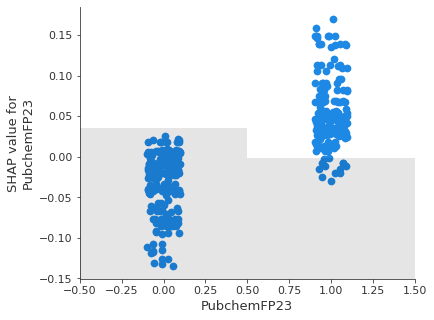

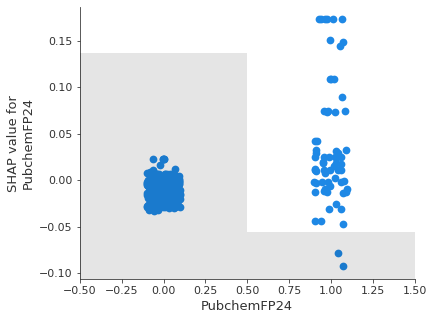

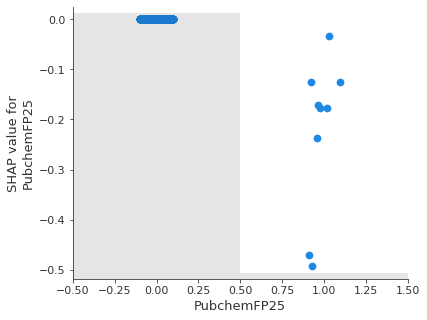

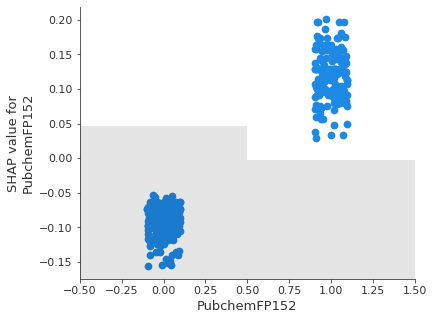

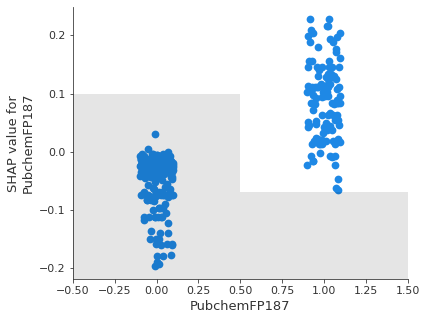

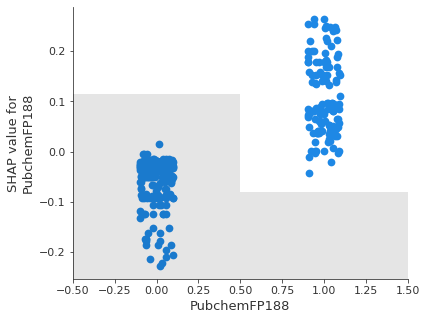

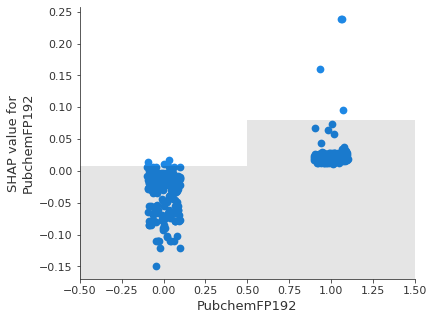

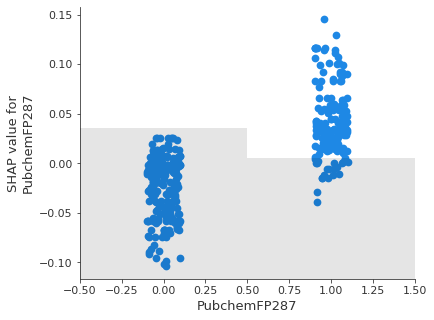

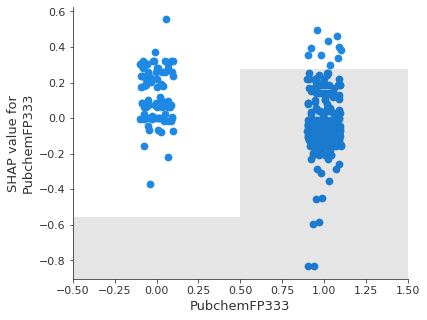

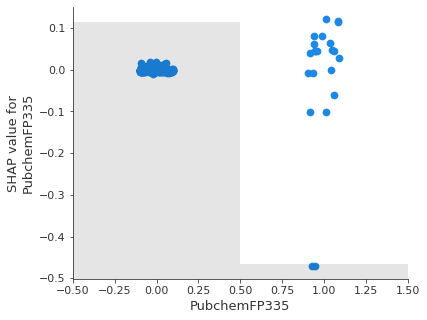

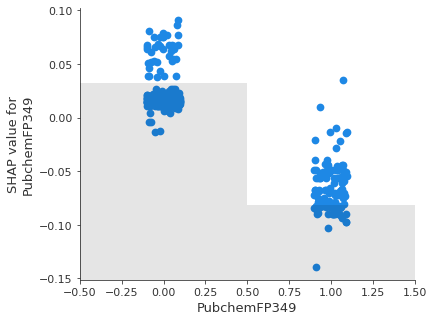

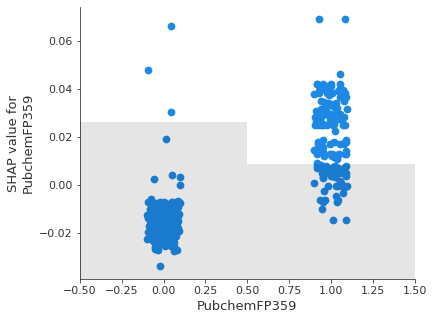

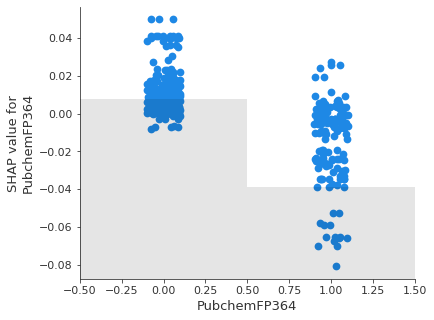

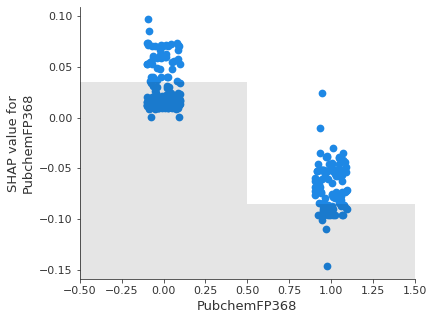

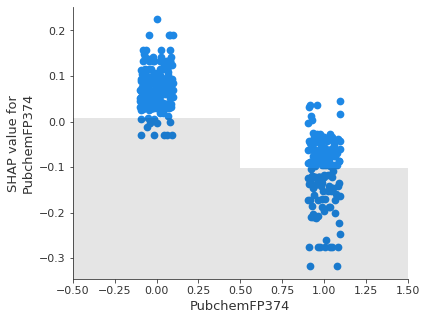

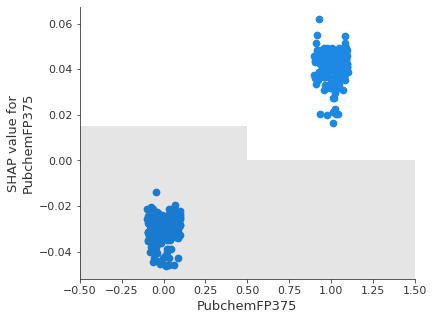

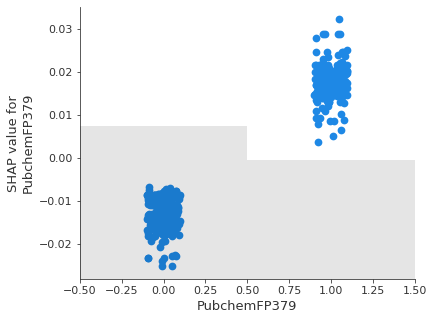

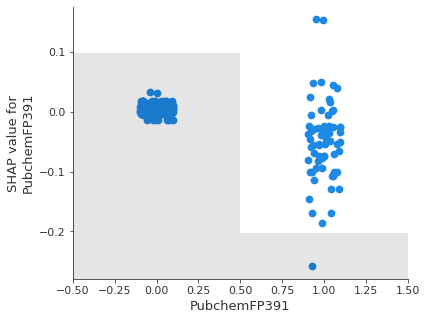

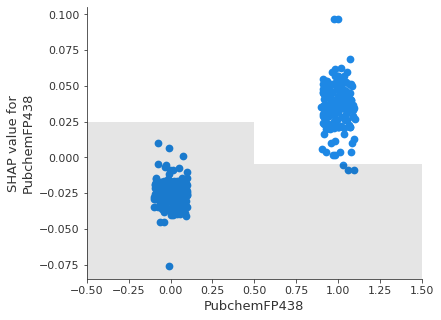

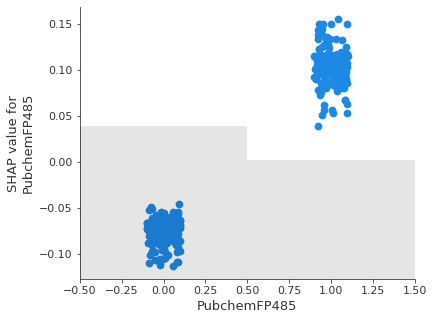

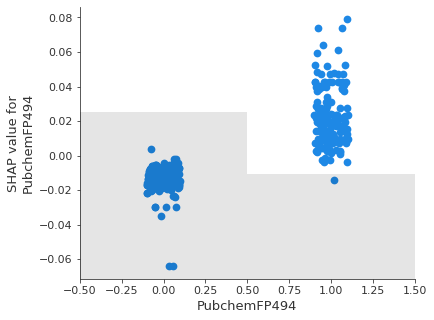

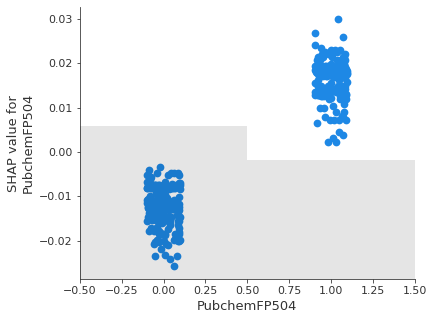

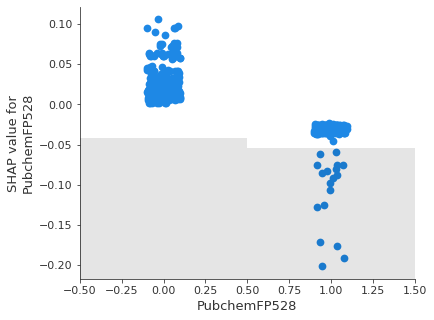

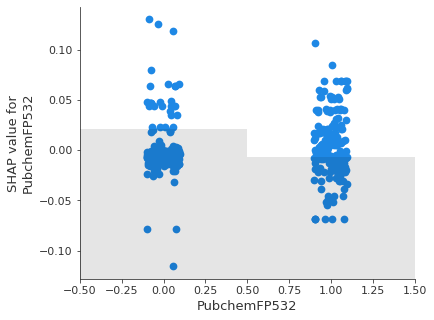

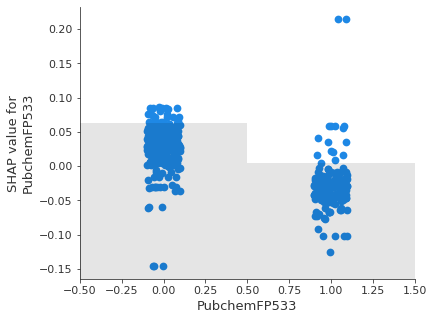

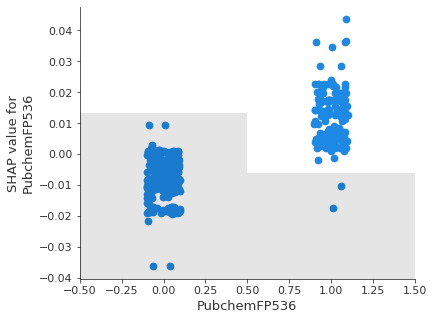

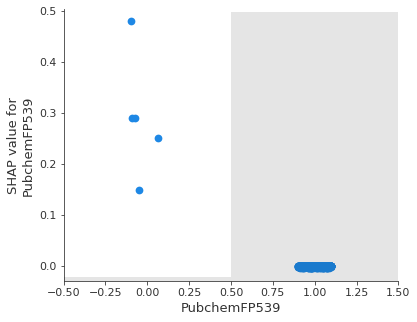

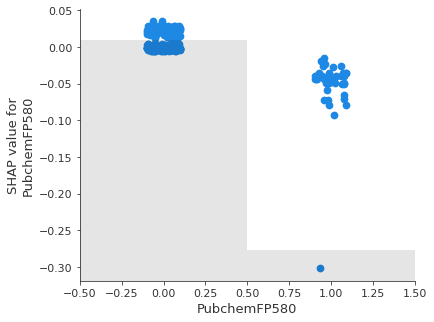

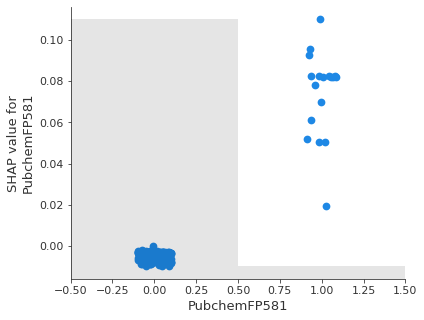

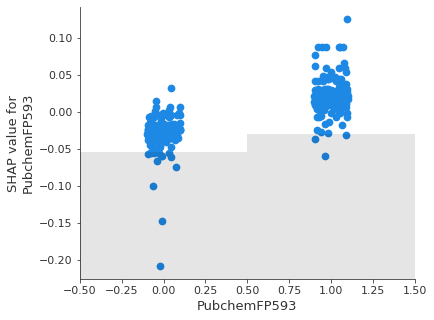

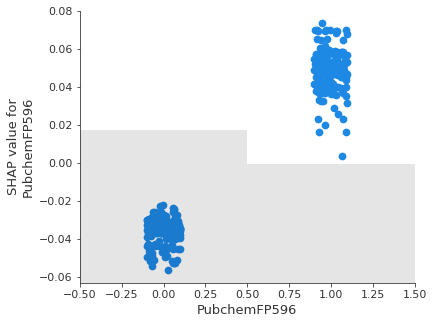

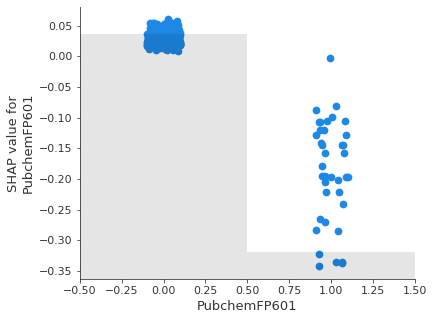

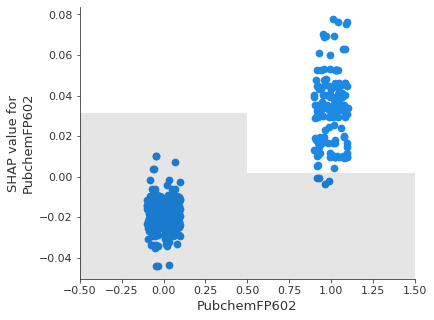

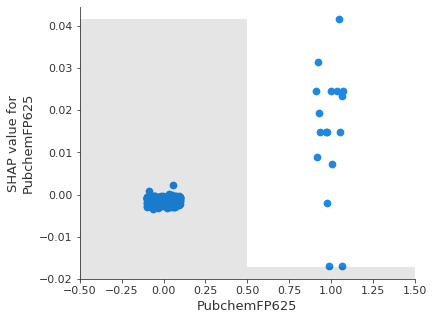

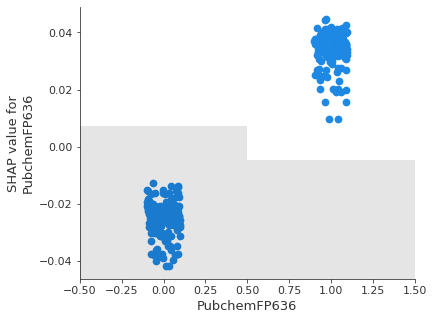

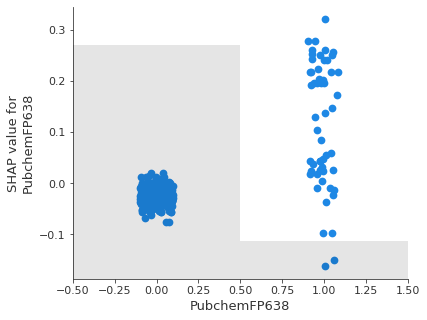

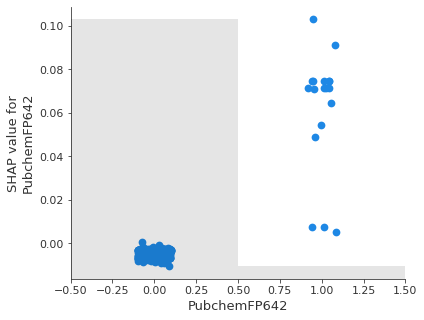

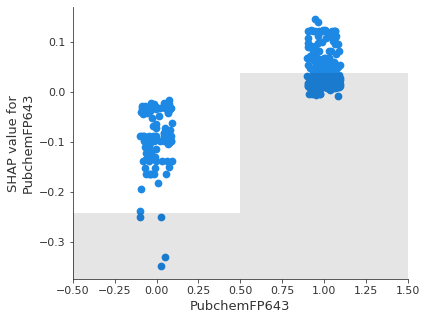

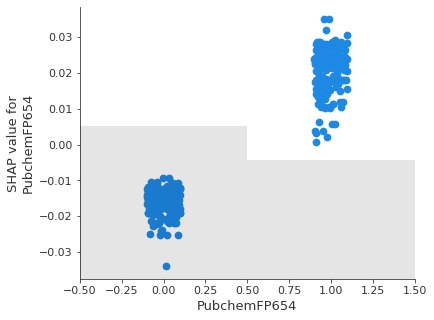

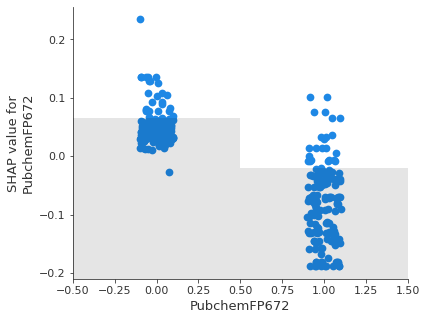

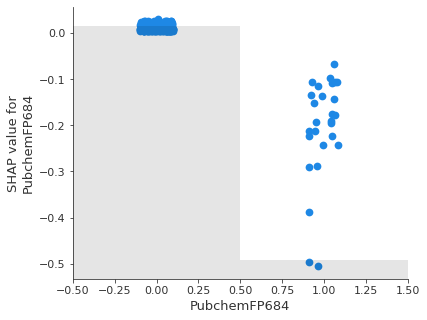

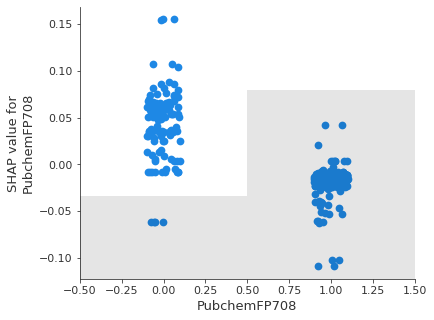

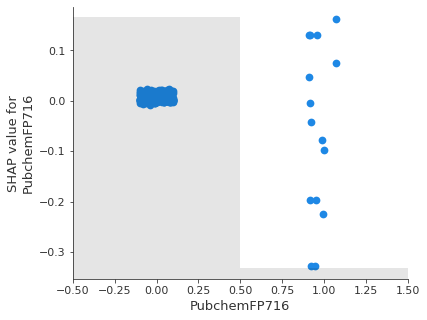

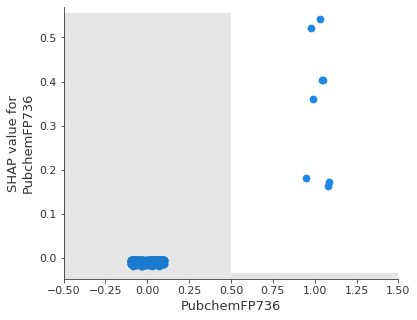

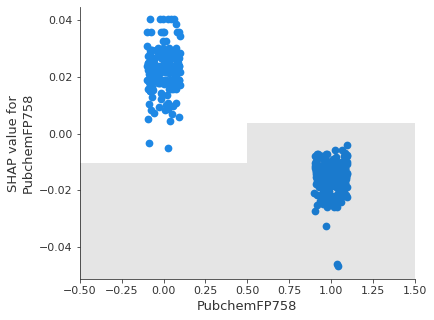

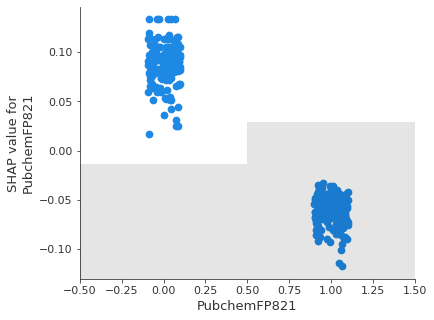

IndexError: index 49 is out of bounds for axis 1 with size 49

In [35]:
for i in range(50):
    shap.plots.scatter(shap_values[:,i],dot_size=60)